In [36]:
from langgraph.graph import StateGraph, START, END
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict, Annotated

In [23]:

load_dotenv()

True

In [24]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [25]:
llm = HuggingFaceEndpoint(
    repo_id="meta-llama/Meta-Llama-3-8B-Instruct",
    task="text-generation"
    )
model = ChatHuggingFace(llm=llm)

In [26]:
def chat_node(state: ChatState):
    messages = state['messages']
    response = model.invoke(messages)
    return {'messages': response}

In [37]:
graph = StateGraph(ChatState)

graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer = checkpointer)

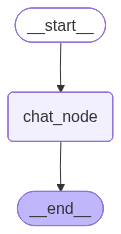

In [38]:
workflow

In [ ]:
thread_id = 'thread_1'
while True:
    user_input = input("Type Here")
    print("User: ", user_input)

    if user_input.lower().strip() in ['exit', 'quit', 'bye']:
        break
    config = {'configurable':{'thread_id': thread_id}}
    result = workflow.invoke({'messages': [HumanMessage(content=user_input)]},config = config)

    print(result['messages'][-1].content)

User:  hey


ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id